<a href="https://colab.research.google.com/github/avimuk/ml-projects/blob/master/E2E_ML_Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reference

https://www.kdnuggets.com/step-by-step-tutorial-to-building-your-first-machine-learning-model

* Features: Input variables used to make predictions in a machine learning model.
* Labels: Output variables that the model is trying to predict.
* Data Splitting: The process of data separation into different sets.
* Training Set: Data used to train the machine learning model.
* Test Set: Data used to evaluate the performance of the trained model.
* Validation Set: Data use used during the training process to tune hyperparameters
* Exploratory Data Analysis (EDA): The process of analyzing and visualizing datasets to summarize their information and discover patterns.
* Models: The outcome of the Machine Learning process. They are the mathematical representation of the patterns and relationships within the data.
* Overfitting: Occurs when the model is generalized too well and learns the data noise. The model can predict well in the training but not in the test set.
* Underfitting: When a model is too simple to capture the underlying patterns in the data. The model performance in training and test sets could be better.
* Hyperparameters: Configuration settings are used to tune the model and are set before training begins.
* Cross-validation: a technique for evaluating the model by partitioning the original sample into training and validation sets multiple times.
* Feature Engineering: Using domain knowledge to get new features from raw data.
* Model Training: The process of learning the parameters of a model using the training data.
* Model Evaluation: Assessing the performance of a trained model using machine learning metrics like accuracy, precision, and recall.
* Model Deployment: Making a trained model available in a production environment.

# Business Usecase

The business needs to avoid further churn from the company and wants to take action for the customer with a high probability of churning.

With the above business requirements, we need specific metrics to measure whether the model performs well. There are many measurements, but we will use the Recall metric.In monetary values, it might be more beneficial to use Recall, as it tries to minimize the False Negative or decrease the amount of prediction that was not churning while it’s churning. Of course, we can try to aim for balance by using the F1 metric.

# EDA

**Data Load**

In [ ]:
import pandas as pd

df = pd.read_csv('/content/sample_data/WA_Fn-UseC_-Telco-Customer-Churn.csv.xls')
df.head()

**Data Analysis**

In [ ]:
# Get the basic information about the dataset
df.info()

In [ ]:
# Get the numerical summary statistics of the dataset
df.describe()

In [ ]:
# Get the categorical summary statistics of the dataset
df.describe(exclude = 'number')

In [ ]:
# Check for missing values
print(df.isnull().sum())

In [ ]:
# Check for target variable imbalance
print(df['Churn'].value_counts())

Initial Data Analysis summary:

* The dataset contains 7043 rows and most of the columns are categorical.

* Out of 21 columns, we have total 19 features or independent variable and 1 target variable Churn. Customer id is too unique, so not considered.

* Our dataset does not contain missing data, so we don’t need to perform any missing data treatment activity.

* There is a slight imbalance for target variable Churn, as only close to 25% of the churn occurs compared to the non-churn cases.




**Feature analysis in details**

Data Cleaning & Transformation

In [11]:
#transform the TotalCharges feature into a numerical column
import numpy as np
df['TotalCharges'] = df['TotalCharges'].replace('', np.nan)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce').fillna(0)

#SeniorCitizen feature should be categorical so that I would transform it into strings
df['SeniorCitizen'] = df['SeniorCitizen'].astype('str')

#Churn feature is categorical, we would develop new features that show it as a numerical column
df['ChurnTarget'] = df['Churn'].apply(lambda x: 1 if x=='Yes' else 0)

Check the distribution of the numerical features

In [ ]:
# Plot distribution of numearical features

num_features = df.select_dtypes('number').columns
df[num_features].hist(bins=15, figsize=(15, 6), layout=(2, 5))

Check the distribution of the categorical features


In [ ]:
import matplotlib.pyplot as plt

# Plot distribution of categorical features
cat_features = df.drop('customerID', axis =1).select_dtypes(include='object').columns

plt.figure(figsize=(10, 10))
for i, col in enumerate(cat_features, 1):
    plt.subplot(5, 4, i)
    df[col].value_counts().plot(kind='bar')
    plt.title(col)

Check correlation for numerical features
Ref: https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

In [ ]:
import seaborn as sns

# Plot correlations between numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(df[num_features].corr())
plt.title('Correlation Heatmap')

Check correlation for categorical features Ref: https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V

In [ ]:
pip install dython

In [ ]:
from dython.nominal import associations

# Calculate the Cramer’s V and correlation matrix
assoc = associations(df[cat_features], nominal_columns='all', plot=False)
corr_matrix = assoc['corr']

# Plot the heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix)

 Check the numerical outlier with a box plot based on the Interquartile Range (IQR).

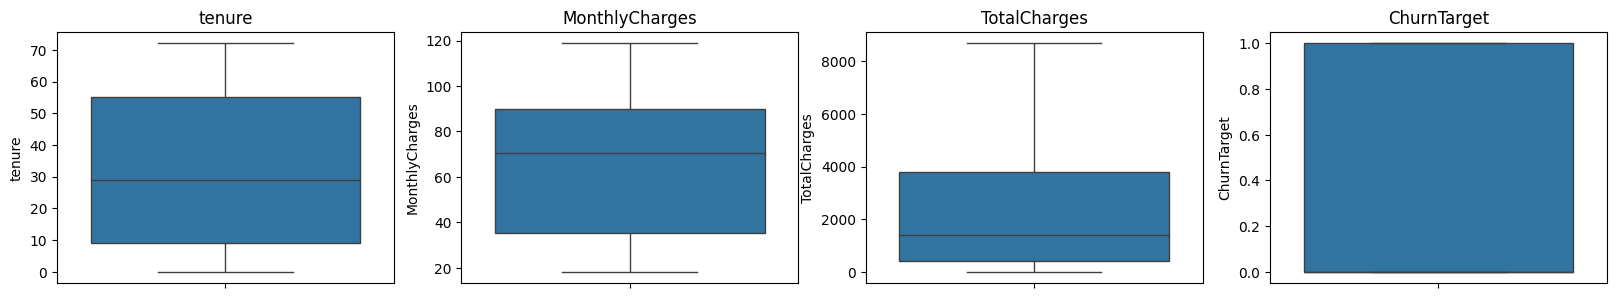

In [24]:
# Plot box plots to identify outliers
plt.figure(figsize=(20, 15))
for i, col in enumerate(num_features, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=df[col])
    plt.title(col)

# Feature Selection

Usually done by combining business knowledge and technical application.
To keep it simple will only use the correlation analysis we have done previously to make the feature selection.

Numeric correlation analysis

In [25]:
target = 'ChurnTarget'
num_features = df.select_dtypes(include=[np.number]).columns.drop(target)

# Calculate correlations
correlations = df[num_features].corrwith(df[target])

# Set a threshold for feature selection
threshold = 0.3

# Choose features more than the threshold

selected_num_features = correlations[abs(correlations) > threshold].index.tolist()


Categorical correlation analysis

In [ ]:
categorical_target = 'Churn'

# Calculate correlations
assoc = associations(df[cat_features], nominal_columns='all', plot=False)
corr_matrix = assoc['corr']

# Set a threshold for feature selection
threshold = 0.3

# Choose features more than the threshold
selected_cat_features = corr_matrix[corr_matrix.loc[categorical_target] > threshold ].index.tolist()

# Remove target from the list
del selected_cat_features[-1]

Combine the features

In [29]:
selected_features = []
selected_features.extend(selected_num_features)
selected_features.extend(selected_cat_features)

print(selected_features)

['tenure', 'InternetService', 'OnlineSecurity', 'TechSupport', 'Contract', 'PaymentMethod']
